In [1]:
import codecs

In [2]:
import dask.dataframe as dd

In [3]:
df_dataset = dd.read_csv('./conceptnet_disasters/df-disasters-*.csv',names=['start','rel','end','weight'])

In [4]:
df_dataset.head()

,start,rel,end,weight
0,/c/en/about,/r/Antonym,/c/en/precisely,0.155
1,/c/en/accident,/r/Antonym,/c/en/on_purpose,0.319
2,/c/en/accident,/r/Antonym,/c/en/planned,0.147
3,/c/en/accident,/r/Antonym,/c/en/purpose,0.319
4,/c/en/accidentally/r,/r/Antonym,/c/en/intentionally,1.000


In [5]:
df_dataset.tail()

,start,rel,end,weight
1291,/c/en/victoria/n,/r/dbpedia/product,/c/en/motorcycle,0.5
1292,/c/en/volkswagen,/r/dbpedia/product,/c/en/bus,0.5
1293,/c/en/volkswagen,/r/dbpedia/product,/c/en/car,0.5
1294,/c/en/volkswagen,/r/dbpedia/product,/c/en/truck,0.5
1295,/c/en/zanella,/r/dbpedia/product,/c/en/motorcycle,0.5


### Datasets

In [6]:
len(df_dataset)

287727

### Concepts

In [7]:
x = list(df_dataset.start.unique().values.compute())+list(df_dataset.end.unique().values.compute())

In [8]:
len(x)

174915

### Relations

In [9]:
df_dataset.rel.unique().values.compute()

array(['/r/Antonym', '/r/AtLocation', '/r/CapableOf', '/r/Causes',
       '/r/CausesDesire', '/r/CreatedBy', '/r/DefinedAs',
       '/r/DerivedFrom', '/r/Desires', '/r/DistinctFrom', '/r/Entails',
       '/r/EtymologicallyRelatedTo', '/r/FormOf', '/r/HasA',
       '/r/HasContext', '/r/HasFirstSubevent', '/r/HasLastSubevent',
       '/r/HasPrerequisite', '/r/HasProperty', '/r/HasSubevent',
       '/r/InstanceOf', '/r/IsA', '/r/LocatedNear', '/r/MadeOf',
       '/r/MannerOf', '/r/MotivatedByGoal', '/r/NotCapableOf',
       '/r/NotDesires', '/r/NotHasProperty', '/r/PartOf',
       '/r/ReceivesAction', '/r/RelatedTo', '/r/SimilarTo', '/r/Synonym',
       '/r/UsedFor', '/r/dbpedia/capital', '/r/dbpedia/field',
       '/r/dbpedia/genre', '/r/dbpedia/genus', '/r/dbpedia/influencedBy',
       '/r/dbpedia/language', '/r/dbpedia/occupation',
       '/r/dbpedia/product', '/r/EtymologicallyDerivedFrom',
       '/r/dbpedia/knownFor'], dtype=object)

In [10]:
df_dataset.rel.unique().size.compute()

45

In [11]:
# relation rank
rel_count = df_dataset.groupby(['rel']).size().compute()

In [12]:
%matplotlib inline

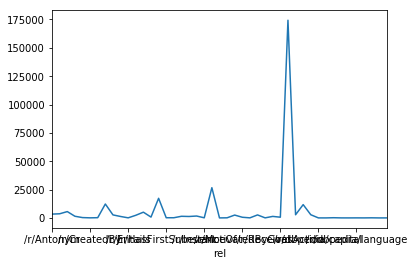

In [13]:
rel_count.plot()

In [14]:
rel_count.sort_values(ascending=False)

rel
/r/RelatedTo                    174326
/r/IsA                           26654
/r/HasContext                    17300
/r/DerivedFrom                   12262
/r/Synonym                       11719
/r/CapableOf                      5581
/r/FormOf                         5061
/r/AtLocation                     3656
/r/Antonym                        3359
/r/UsedFor                        2802
/r/SimilarTo                      2794
/r/Desires                        2664
/r/NotDesires                     2643
/r/MannerOf                       2515
/r/EtymologicallyRelatedTo        2316
/r/HasSubevent                    1664
/r/Causes                         1469
/r/HasPrerequisite                1435
/r/PartOf                         1335
/r/DistinctFrom                   1275
/r/HasProperty                    1265
/r/HasA                            731
/r/ReceivesAction                  635
/r/MotivatedByGoal                 591
/r/CausesDesire                    294
/r/DefinedAs         

In [15]:
evidence_rel = list(rel_count.sort_values(ascending=False)[1:-9].keys())

In [16]:
len(evidence_rel)

35

In [17]:
evidence_rel

['/r/IsA',
 '/r/HasContext',
 '/r/DerivedFrom',
 '/r/Synonym',
 '/r/CapableOf',
 '/r/FormOf',
 '/r/AtLocation',
 '/r/Antonym',
 '/r/UsedFor',
 '/r/SimilarTo',
 '/r/Desires',
 '/r/NotDesires',
 '/r/MannerOf',
 '/r/EtymologicallyRelatedTo',
 '/r/HasSubevent',
 '/r/Causes',
 '/r/HasPrerequisite',
 '/r/PartOf',
 '/r/DistinctFrom',
 '/r/HasProperty',
 '/r/HasA',
 '/r/ReceivesAction',
 '/r/MotivatedByGoal',
 '/r/CausesDesire',
 '/r/DefinedAs',
 '/r/dbpedia/genre',
 '/r/HasLastSubevent',
 '/r/HasFirstSubevent',
 '/r/InstanceOf',
 '/r/MadeOf',
 '/r/dbpedia/product',
 '/r/CreatedBy',
 '/r/Entails',
 '/r/NotCapableOf',
 '/r/NotHasProperty']

### Tasks

In [18]:
task_rel = '/r/Causes'

In [19]:
df_kgr_ = df_dataset[df_dataset.rel.isin(evidence_rel)]

In [20]:
df_kgr_.head()

,start,rel,end,weight
0,/c/en/about,/r/Antonym,/c/en/precisely,0.155
1,/c/en/accident,/r/Antonym,/c/en/on_purpose,0.319
2,/c/en/accident,/r/Antonym,/c/en/planned,0.147
3,/c/en/accident,/r/Antonym,/c/en/purpose,0.319
4,/c/en/accidentally/r,/r/Antonym,/c/en/intentionally,1.000


In [21]:
len(df_kgr_)

113260

In [22]:
# for one file, first collect all patition compute()

In [24]:
kgr_inv = [{'start':row[1]['end'],'rel':row[1]['rel']+'_inv','end':row[1]['start'],'weight':row[1]['weight']} for row in df_kgr_.iterrows()]

In [25]:
kgr_inv[:5]

[{'end': '/c/en/about',
  'rel': '/r/Antonym_inv',
  'start': '/c/en/precisely',
  'weight': 0.155},
 {'end': '/c/en/accident',
  'rel': '/r/Antonym_inv',
  'start': '/c/en/on_purpose',
  'weight': 0.319},
 {'end': '/c/en/accident',
  'rel': '/r/Antonym_inv',
  'start': '/c/en/planned',
  'weight': 0.147},
 {'end': '/c/en/accident',
  'rel': '/r/Antonym_inv',
  'start': '/c/en/purpose',
  'weight': 0.319},
 {'end': '/c/en/accidentally/r',
  'rel': '/r/Antonym_inv',
  'start': '/c/en/intentionally',
  'weight': 1.0}]

In [26]:
import pandas as pd

In [27]:
df_kgr_inv = dd.from_pandas(pd.DataFrame.from_records(kgr_inv),npartitions=1)

In [28]:
df_kgr = dd.concat([df_kgr_,df_kgr_inv],interleave_partitions=True)

In [ ]:
# compute() not in-place?

In [34]:
df_kgr_all = df_kgr.compute()

In [36]:
df_kgr_all[['start','end','rel']].to_csv('conceptnet2kgr/kb_env_rl.txt',sep='\t',index=False,header=False)

In [37]:
len(df_kgr_all)

226520

In [35]:
df_kgr_all.head()

,end,rel,start,weight
0,/c/en/precisely,/r/Antonym,/c/en/about,0.155
1,/c/en/on_purpose,/r/Antonym,/c/en/accident,0.319
2,/c/en/planned,/r/Antonym,/c/en/accident,0.147
3,/c/en/purpose,/r/Antonym,/c/en/accident,0.319
4,/c/en/intentionally,/r/Antonym,/c/en/accidentally/r,1.000


In [42]:
entity = list(set(list(df_kgr_all.start.unique())+list(df_kgr_all.end.unique())))

In [43]:
len(entity)

81616

In [44]:
entity[:10]

['/c/en/being_that',
 '/c/en/snow_gnat',
 '/c/en/thunder/v',
 '/c/en/spoon/n',
 '/c/en/marilyn_horne',
 '/c/en/bear_witness/v',
 '/c/en/dress_up_in_nice_clothing',
 '/c/en/make_home',
 '/c/en/homeworld',
 '/c/en/home_theater/n']

In [45]:
entity2id = dict([(x,i) for i,x in enumerate(entity)])

In [46]:
entity2id['/c/en/accident']

58430

In [48]:
rel = list(df_kgr_all.rel.unique())

In [49]:
len(rel)

70

In [50]:
rel

['/r/Antonym',
 '/r/AtLocation',
 '/r/CapableOf',
 '/r/Causes',
 '/r/CausesDesire',
 '/r/CreatedBy',
 '/r/DefinedAs',
 '/r/DerivedFrom',
 '/r/Desires',
 '/r/DistinctFrom',
 '/r/Entails',
 '/r/EtymologicallyRelatedTo',
 '/r/FormOf',
 '/r/HasA',
 '/r/HasContext',
 '/r/HasFirstSubevent',
 '/r/HasLastSubevent',
 '/r/HasPrerequisite',
 '/r/HasProperty',
 '/r/HasSubevent',
 '/r/InstanceOf',
 '/r/IsA',
 '/r/MadeOf',
 '/r/MannerOf',
 '/r/MotivatedByGoal',
 '/r/NotCapableOf',
 '/r/NotDesires',
 '/r/NotHasProperty',
 '/r/PartOf',
 '/r/ReceivesAction',
 '/r/SimilarTo',
 '/r/Synonym',
 '/r/UsedFor',
 '/r/dbpedia/genre',
 '/r/dbpedia/product',
 '/r/Antonym_inv',
 '/r/AtLocation_inv',
 '/r/CapableOf_inv',
 '/r/Causes_inv',
 '/r/CausesDesire_inv',
 '/r/CreatedBy_inv',
 '/r/DefinedAs_inv',
 '/r/DerivedFrom_inv',
 '/r/Desires_inv',
 '/r/DistinctFrom_inv',
 '/r/Entails_inv',
 '/r/EtymologicallyRelatedTo_inv',
 '/r/FormOf_inv',
 '/r/HasA_inv',
 '/r/HasContext_inv',
 '/r/HasFirstSubevent_inv',
 '/r/HasLas

In [51]:
relation2id = dict([(x,i) for i,x in enumerate(rel)])

In [52]:
relation2id

{'/r/Antonym': 0,
 '/r/Antonym_inv': 35,
 '/r/AtLocation': 1,
 '/r/AtLocation_inv': 36,
 '/r/CapableOf': 2,
 '/r/CapableOf_inv': 37,
 '/r/Causes': 3,
 '/r/CausesDesire': 4,
 '/r/CausesDesire_inv': 39,
 '/r/Causes_inv': 38,
 '/r/CreatedBy': 5,
 '/r/CreatedBy_inv': 40,
 '/r/DefinedAs': 6,
 '/r/DefinedAs_inv': 41,
 '/r/DerivedFrom': 7,
 '/r/DerivedFrom_inv': 42,
 '/r/Desires': 8,
 '/r/Desires_inv': 43,
 '/r/DistinctFrom': 9,
 '/r/DistinctFrom_inv': 44,
 '/r/Entails': 10,
 '/r/Entails_inv': 45,
 '/r/EtymologicallyRelatedTo': 11,
 '/r/EtymologicallyRelatedTo_inv': 46,
 '/r/FormOf': 12,
 '/r/FormOf_inv': 47,
 '/r/HasA': 13,
 '/r/HasA_inv': 48,
 '/r/HasContext': 14,
 '/r/HasContext_inv': 49,
 '/r/HasFirstSubevent': 15,
 '/r/HasFirstSubevent_inv': 50,
 '/r/HasLastSubevent': 16,
 '/r/HasLastSubevent_inv': 51,
 '/r/HasPrerequisite': 17,
 '/r/HasPrerequisite_inv': 52,
 '/r/HasProperty': 18,
 '/r/HasProperty_inv': 53,
 '/r/HasSubevent': 19,
 '/r/HasSubevent_inv': 54,
 '/r/InstanceOf': 20,
 '/r/Ins

In [53]:
train = []
for row in df_kgr_all.iterrows():
    train.append((entity2id[row[1]['start']],entity2id[row[1]['end']],relation2id[row[1]['rel']]))

In [54]:
len(train)

226520

In [55]:
f_entity = codecs.open('conceptnet2kgr/entity2id.txt','a+',encoding='utf-8')
f_relation = codecs.open('conceptnet2kgr/relation2id.txt','a+',encoding='utf-8')
f_train = codecs.open('conceptnet2kgr/train2id.txt','a+',encoding='utf-8')

In [56]:
f_entity.write(str(len(entity))+'\n')
f_relation.write(str(len(rel))+'\n')
f_train.write(str(len(train))+'\n')

In [57]:
[f_entity.write(k+'\t'+str(v)+'\n') for k,v in entity2id.items()]
[f_relation.write(k+'\t'+str(v)+'\n') for k,v in relation2id.items()]
[f_train.write(str(t[0])+'\t'+str(t[1])+'\t'+str(t[2])+'\n') for t in train]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [58]:
f_entity.close()
f_relation.close()
f_train.close()